In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime 

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
1. 3개의 데이터를 병합하시요.

====이후문제는 병합한 데이터프레임을 이용 ===========

2. 년도, 월별로 인덱스를 설정(멀티인덱스) 하고
데이터를 보여 주시요

3. 년도 및 월별 평균 사망자를 보여주시요

4.  2016년 사고대비 사망율을 구하시요

5. 2014년도 월별 사망, 부상 데이터를 바차트로
보여주시요

6. 2015년 대비  사망이 가장 많이 증가한
2016년 도 월을 구하시요

1. 3개의 데이터를 병합하시요.

In [155]:
df1=pd.read_csv('../data/2014년 졸음운전 교통사고.csv',encoding = 'cp949')
df2=pd.read_csv('../data/2015년 졸음운전 교통사고.csv',encoding = 'cp949')
df3=pd.read_csv('../data/2016년 졸음운전 교통사고.csv',encoding = 'cp949')

In [156]:
df = pd.concat([df1,df2,df3],ignore_index=True)
df

,구분,사고(건),사망(명),부상(명)
0,2014년1월,169,7,347
1,2014년2월,145,3,268
2,2014년3월,206,12,358
3,2014년4월,182,4,360
4,2014년5월,218,17,474
5,2014년6월,233,13,457
6,2014년7월,229,14,431
7,2014년8월,222,9,447
8,2014년9월,225,15,430
9,2014년10월,210,14,392


In [146]:
df.index = df['구분']
df
del df['구분']

In [157]:
df.set_index('구분', inplace=True)
df.index = pd.to_datetime(df.index, format='%Y년%m월')
df

,사고(건),사망(명),부상(명)
구분,,,
2014-01-01,169,7,347
2014-02-01,145,3,268
2014-03-01,206,12,358
2014-04-01,182,4,360
2014-05-01,218,17,474
2014-06-01,233,13,457
2014-07-01,229,14,431
2014-08-01,222,9,447
2014-09-01,225,15,430


2. 년도, 월별로 인덱스를 설정(멀티인덱스) 하고
데이터를 보여 주시요

In [141]:
df.index = [df.index.year,df.index.month]
df

사고(건)  사망(명)  부상(명)
구분   구분                     
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392
     11    209     10    386
     12    178     12    329
2015 1     205      8    375
     2     175      8    375
     3     237      4    492
     4     227     10    486
     5     231      9    504
     6     207      8    401
     7     273      7    556
     8     268     19    534
     9     252     10    501
     10    214     14    475
     11    199      3    398
     12    213      8    428
2016 1     192      5    387
     2     174      6    328
     3     217      7    435
     4     216      7    419
     5     239     13    522
     6     200     12    362
     7     227      9    460
     8     230      7    490
     9     187     13    347
     10    183     10    367
     11    200      5    418
     12    168      4    364

3. 년도 및 월별 평균 사망자를 보여주시요

In [136]:
df.groupby([df.index.year,df.index.month]).mean()[['사망(명)']]
df

,사고(건),사망(명),부상(명),사망률
구분,,,,
2014-01-01,169,7,347,NaN
2014-02-01,145,3,268,NaN
2014-03-01,206,12,358,NaN
2014-04-01,182,4,360,NaN
2014-05-01,218,17,474,NaN
2014-06-01,233,13,457,NaN
2014-07-01,229,14,431,NaN
2014-08-01,222,9,447,NaN
2014-09-01,225,15,430,NaN


4.  2016년 사고대비 사망율을 구하시요


In [135]:
df_2016 = df['2016'].sum()
k = round(df_2016['사고(건)']/df_2016['사망(명)'],2)
print( '2016년 사고대비 사망율 : ', k )

df['사망률'] = round(df['2016']['사고(건)']/df['2016']['사망(명)'], 2)
df['2016']

2016년 사고대비 사망율 :  24.83


,사고(건),사망(명),부상(명),사망률
구분,,,,
2016-01-01,192,5,387,38.40
2016-02-01,174,6,328,29.00
2016-03-01,217,7,435,31.00
2016-04-01,216,7,419,30.86
2016-05-01,239,13,522,18.38
2016-06-01,200,12,362,16.67
2016-07-01,227,9,460,25.22
2016-08-01,230,7,490,32.86
2016-09-01,187,13,347,14.38


5. 2014년도 월별 사망, 부상 데이터를 바차트로
보여주시요

<AxesSubplot:xlabel='구분'>

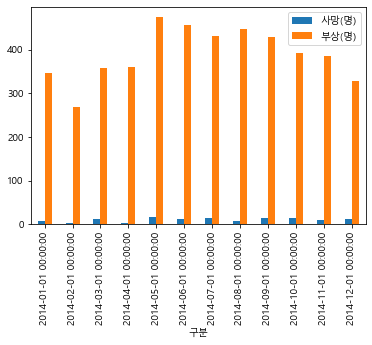

In [105]:
df['2014'][['사망(명)','부상(명)']].plot(kind='bar')

6. 2015년 대비  사망이 가장 많이 증가한
2016년 도 월을 구하시요

In [128]:
df['2015']['사망(명)']

구분
2015-01-01     8
2015-02-01     8
2015-03-01     4
2015-04-01    10
2015-05-01     9
2015-06-01     8
2015-07-01     7
2015-08-01    19
2015-09-01    10
2015-10-01    14
2015-11-01     3
2015-12-01     8
Name: 사망(명), dtype: int64

구분
2015-01-01   NaN
2015-02-01   NaN
2015-03-01   NaN
2015-04-01   NaN
2015-05-01   NaN
2015-06-01   NaN
2015-07-01   NaN
2015-08-01   NaN
2015-09-01   NaN
2015-10-01   NaN
2015-11-01   NaN
2015-12-01   NaN
2016-01-01   NaN
2016-02-01   NaN
2016-03-01   NaN
2016-04-01   NaN
2016-05-01   NaN
2016-06-01   NaN
2016-07-01   NaN
2016-08-01   NaN
2016-09-01   NaN
2016-10-01   NaN
2016-11-01   NaN
2016-12-01   NaN
Name: 사망(명), dtype: float64

구분
2016-01-01     5
2016-02-01     6
2016-03-01     7
2016-04-01     7
2016-05-01    13
2016-06-01    12
2016-07-01     9
2016-08-01     7
2016-09-01    13
2016-10-01    10
2016-11-01     5
2016-12-01     4
Name: 사망(명), dtype: int64